In [1]:
#TF-IDF untuk SVM
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import save_npz

# Baca dataset
balanced_dataset = pd.read_csv('final_preprocessed_dataset.csv')

# Vektorisasi menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Sesuaikan max_features sesuai kebutuhan
tfidf_matrix = tfidf_vectorizer.fit_transform(balanced_dataset['text_content'])

# Simpan TF-IDF matrix untuk digunakan di model SVM
save_npz('tfidf_matrix.npz', tfidf_matrix)

# Simpan vektorizer TF-IDF untuk transformasi data baru nanti
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

In [2]:
#Pembagian Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, balanced_dataset['is_gambling'], test_size=0.2, random_state=42)

In [3]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (38936, 5000)
X_test shape: (9734, 5000)
y_train shape: (38936,)
y_test shape: (9734,)


In [4]:
# Tampilkan beberapa sampel dari X_train dan y_train
print("Sample X_train:", X_train[:5])  # Menampilkan 5 sampel pertama
print("Sample y_train:", y_train[:5])

# Tampilkan beberapa sampel dari X_test dan y_test
print("Sample X_test:", X_test[:5])  # Menampilkan 5 sampel pertama
print("Sample y_test:", y_test[:5])

Sample X_train:   (0, 1064)	0.03918602275088877
  (0, 1447)	0.7454890134240136
  (0, 3323)	0.04073410824055367
  (0, 2451)	0.03981751216316295
  (0, 2873)	0.035432166874907446
  (0, 2023)	0.059439191083420176
  (0, 4786)	0.03323060692300724
  (0, 3904)	0.11037942812615363
  (0, 2025)	0.03770276110341141
  (0, 2537)	0.05795073074029367
  (0, 4484)	0.03526233009486343
  (0, 666)	0.08501088969347294
  (0, 3748)	0.050597127983209776
  (0, 1110)	0.08780126799831436
  (0, 2831)	0.02785570477537587
  (0, 1515)	0.03202653620820281
  (0, 525)	0.07688810765879116
  (0, 2785)	0.04862878253959831
  (0, 384)	0.039242253043508576
  (0, 3409)	0.042281257718108436
  (0, 4983)	0.033377398322505684
  (0, 460)	0.06329263256858045
  (0, 4916)	0.02493564546701343
  (0, 531)	0.03251177927225214
  (0, 4597)	0.348959698576754
  :	:
  (4, 2791)	0.00709083705372612
  (4, 2107)	0.009834746001724425
  (4, 3427)	0.9249177979469787
  (4, 145)	0.021677169415918063
  (4, 195)	0.036053936738877704
  (4, 193)	0.0240766

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4907
           1       1.00      0.99      0.99      4827

    accuracy                           0.99      9734
   macro avg       0.99      0.99      0.99      9734
weighted avg       0.99      0.99      0.99      9734

SVM Confusion Matrix:
 [[4890   17]
 [  40 4787]]
SVM Accuracy: 0.99
SVM Precision: 1.00
SVM Recall: 0.99
SVM F1 Score: 0.99


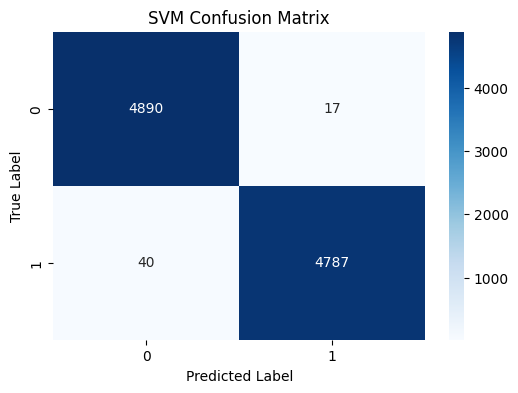

In [6]:
#Pelatihan Model SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', C=1, random_state=42)

# Latih model SVM
svm_model.fit(X_train, y_train)

# Prediksi pada set pengujian
y_pred_svm = svm_model.predict(X_test)

# Evaluasi performa model SVM
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Metrik evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"SVM Precision: {precision_svm:.2f}")
print(f"SVM Recall: {recall_svm:.2f}")
print(f"SVM F1 Score: {f1_svm:.2f}")

# Matriks kebingungan
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [9]:
#CROSS VALIDATION
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer

# Asumsikan X_text dan y sudah didefinisikan
# Vektorisasi menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(balanced_dataset['text_content'])

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', C=1, random_state=42)

# K-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm_model, X_tfidf, balanced_dataset['is_gambling'], cv=kfold, scoring='accuracy')

print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")

Cross-Validation Scores: [0.99455517 0.99537703 0.9952743  0.9949661  0.99414424]
Mean Accuracy: 0.99
Standard Deviation: 0.00


Validation Accuracy: 1.00
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4907
           1       1.00      0.99      0.99      4827

    accuracy                           0.99      9734
   macro avg       0.99      0.99      0.99      9734
weighted avg       0.99      0.99      0.99      9734

SVM Confusion Matrix:
 [[4888   19]
 [  39 4788]]
SVM Accuracy: 0.99
SVM Precision: 1.00
SVM Recall: 0.99
SVM F1 Score: 0.99


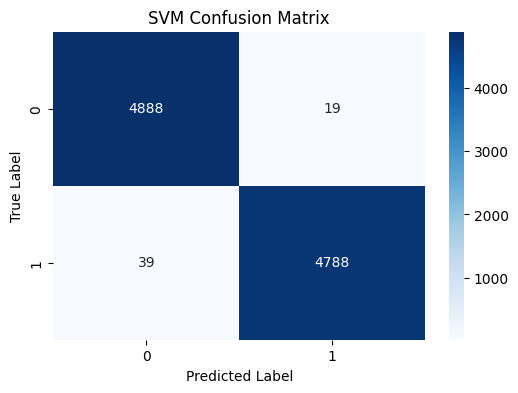

In [10]:
#DATA VALIDATION
# Pembagian Data dengan Validasi
X_train_full, X_test, y_train_full, y_test = train_test_split(tfidf_matrix, balanced_dataset['is_gambling'], test_size=0.2, random_state=42)

# Pisahkan sebagian dari data pelatihan untuk validasi
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2 dari total data

# Pelatihan Model SVM dengan Validasi
svm_model = SVC(kernel='linear', C=1, random_state=42)

# Latih model SVM
svm_model.fit(X_train, y_train)

# Evaluasi pada set validasi
y_val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Prediksi pada set pengujian
y_pred_svm = svm_model.predict(X_test)

# Evaluasi performa model SVM pada set pengujian
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Metrik evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"SVM Precision: {precision_svm:.2f}")
print(f"SVM Recall: {recall_svm:.2f}")
print(f"SVM F1 Score: {f1_svm:.2f}")

# Matriks kebingungan
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

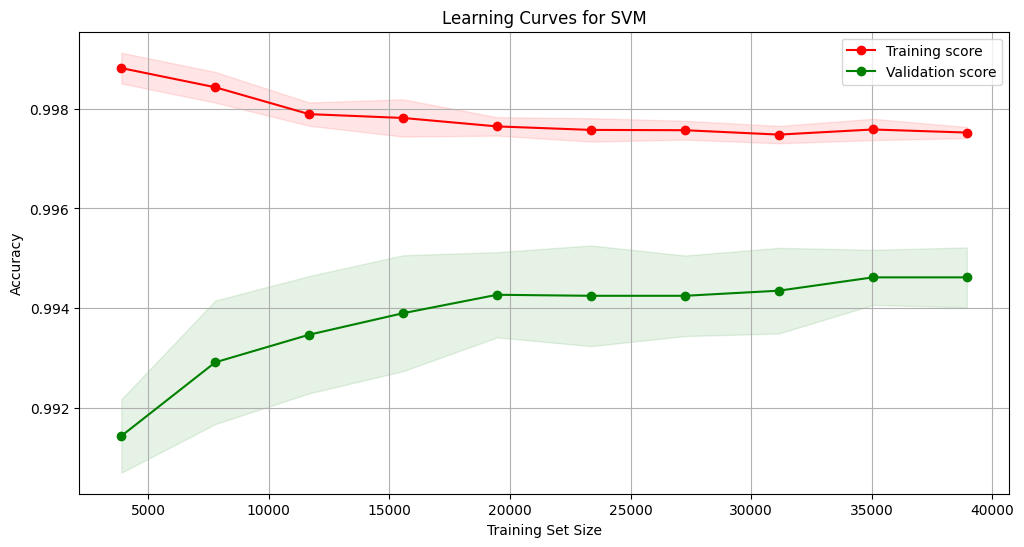

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Vektorisasi menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(balanced_dataset['text_content'])
y = balanced_dataset['is_gambling']

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', C=1, random_state=42)

# Menggunakan learning_curve untuk mendapatkan skor pelatihan dan validasi
train_sizes, train_scores, val_scores = learning_curve(
    svm_model, X_tfidf, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Menghitung rata-rata dan standar deviasi dari skor pelatihan dan validasi
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot kurva pembelajaran
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation score')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')

plt.title('Learning Curves for SVM')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [14]:
import joblib

# Menyimpan model SVM
joblib.dump(svm_model, 'svm_model_gambling_noy.pkl')
# Memuat model SVM
#loaded_svm_model = joblib.load('svm_model_gambling_noy.pkl')

['svm_model_gambling_noy.pkl']